In [1]:
# Libraries to import
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import  r2_score
import pickle

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import  DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
# Dataset load
df_train = pd.read_csv("E:/PROJECTS/Machine Learning/9. Big Mart Sales Prediction/Dataset/train.csv")
df_test = pd.read_csv("E:/PROJECTS/Machine Learning/9. Big Mart Sales Prediction/Dataset/test.csv")

In [3]:
print(df_train.shape)
df_train.head(5)

(8523, 12)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
print(df_test.shape)
df_test.head(5)

(5681, 11)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


Since the test dataset do not contain any target output(Item_Outlet_Sales) so we can not use the test dataset.Rather we will split the train datatset into test and split later formodel building.

In [5]:
# Train dataset load
df = df_train.copy()

In [6]:
# Datafile exploration
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
df.head(4)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800


In [8]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


### Exploratory Data Analysis

In [9]:
# Null value check
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
# Dropping the outlet_size missing values
df.dropna(subset = ['Outlet_Size'], inplace = True)

In [11]:
# Imputing the Item_weight missing values with central tendencies
df['Item_Weight'].fillna(df.Item_Weight.median(),inplace=True)

In [12]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [13]:
# Item_Visibility column
df[df['Item_Visibility']==0]['Item_Visibility'].count()

382

In [14]:
df['Item_Visibility'].fillna(df['Item_Visibility'].median(), inplace=True)

In [15]:
# Outlet year
df['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2009     928
Name: Outlet_Establishment_Year, dtype: int64

In [16]:
# We will convert this years into age of the outlets 
df['Outlet_Years'] = 2009-df['Outlet_Establishment_Year']
df['Outlet_Years'].describe()

count    6113.000000
mean       13.205627
std         8.842615
min         0.000000
25%         5.000000
50%        12.000000
75%        22.000000
max        24.000000
Name: Outlet_Years, dtype: float64

In [17]:
#Removing the outlet establishment column
df.drop("Outlet_Establishment_Year", axis = 1, inplace = True)

In [18]:
# Item identifier
df['Item_Identifier'].value_counts()

NCM07    7
FDT07    7
FDN21    7
FDU12    7
FDE11    7
        ..
FDZ02    1
FDN52    1
FDG28    1
DRI59    1
FDV31    1
Name: Item_Identifier, Length: 1555, dtype: int64

In [19]:
#Lets group the 16 categories into main 3 groups
df['New_Item_type'] = df['Item_Identifier'].apply(lambda x: x[0:2])
df['New_Item_type'] = df['New_Item_type'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})
df['New_Item_type'].value_counts()

Food              4411
Non-Consumable    1139
Drinks             563
Name: New_Item_type, dtype: int64

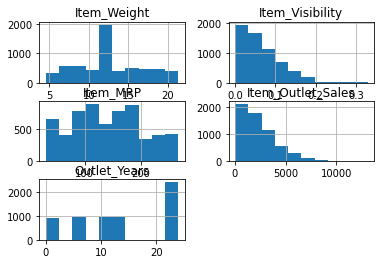

In [20]:
# Checking the distribution of the variables
df.hist()
plt.show()

F:\SOFTWARES\Installed files\PYTHON\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Fruits and Vegetables    883
Snack Foods              868
Household                649
Frozen Foods             615
Dairy                    496
Canned                   471
Baking Goods             463
Health and Hygiene       367
Soft Drinks              312
Meat                     309
Breads                   179
Hard Drinks              148
Others                   123
Starchy Foods            105
Breakfast                 79
Seafood                   46
Name: Item_Type, dtype: int64


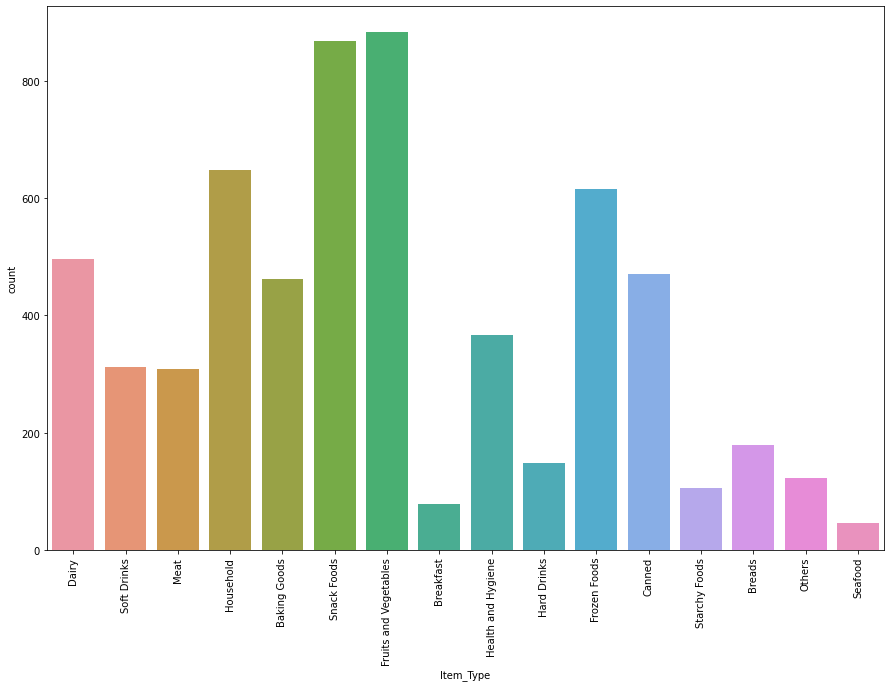

In [21]:
# Item_Type value count
plt.figure(figsize=(15,10))
sns.countplot(df.Item_Type)
plt.xticks(rotation=90)
print(df.Item_Type.value_counts())
plt.show()
warnings.filterwarnings("ignore")

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64


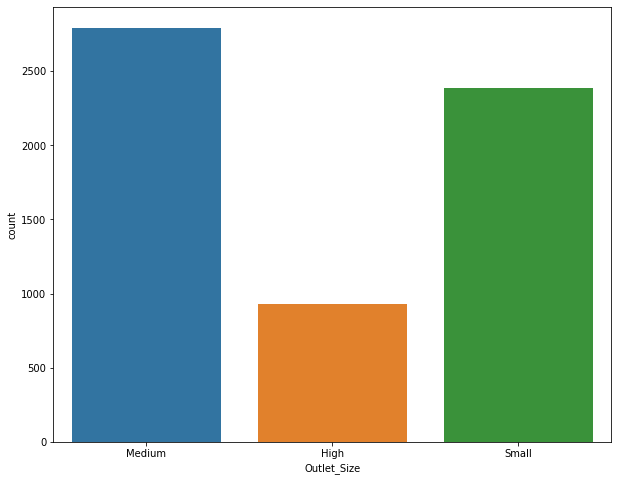

In [22]:
# Outlet_size ditribution
plt.figure(figsize=(10,8))
sns.countplot(df.Outlet_Size)
print(df.Outlet_Size.value_counts())
plt.show()

Tier 3    2795
Tier 1    2388
Tier 2     930
Name: Outlet_Location_Type, dtype: int64


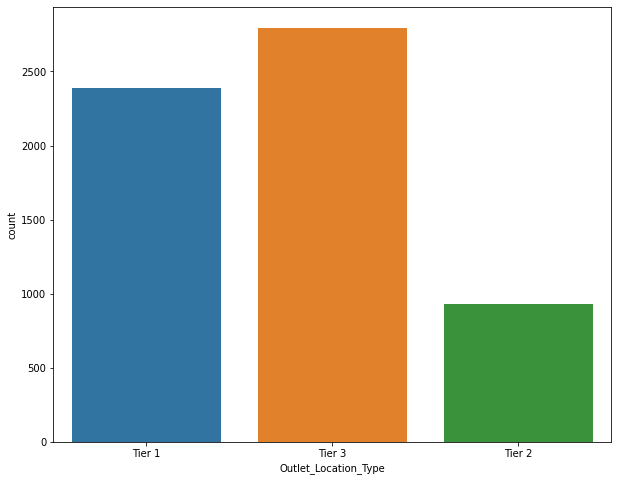

In [23]:
# Outlet location type
plt.figure(figsize=(10,8))
sns.countplot(df.Outlet_Location_Type)
print(df.Outlet_Location_Type.value_counts())
plt.show()

Supermarket Type1    3722
Supermarket Type3     935
Supermarket Type2     928
Grocery Store         528
Name: Outlet_Type, dtype: int64


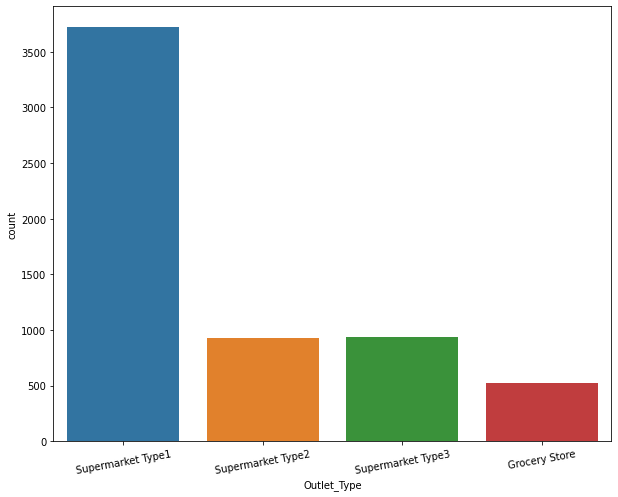

In [24]:
# Outlet_type distributionplt.figure(figsize=(10,8))
plt.figure(figsize=(10,8))
sns.countplot(df.Outlet_Type)
plt.xticks(rotation=10)

print(df.Outlet_Type.value_counts())

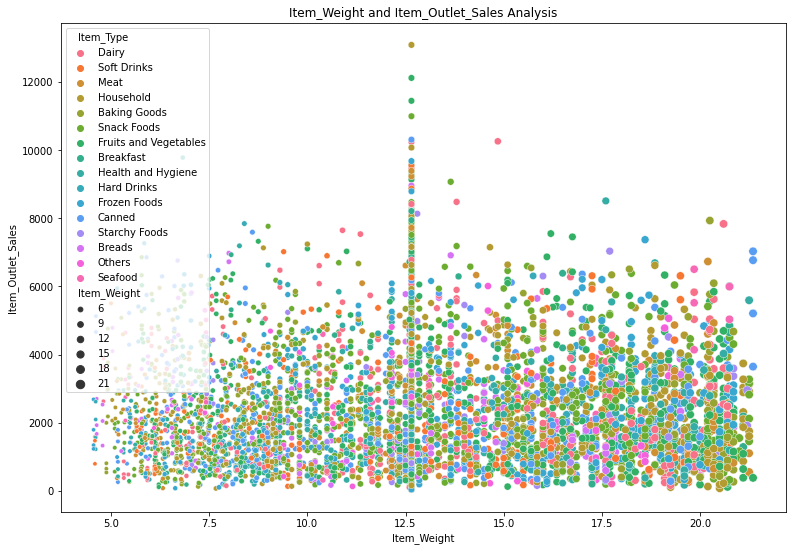

In [25]:
# Item weight and item outlet sales analysis
plt.figure(figsize=(13,9))
plt.xlabel('Item_Weight')
plt.ylabel('Item_Outlet_Sales')
plt.title('Item_Weight and Item_Outlet_Sales Analysis')
sns.scatterplot(x='Item_Weight', y='Item_Outlet_Sales',hue='Item_Type', size='Item_Weight',data=df)
plt.show()

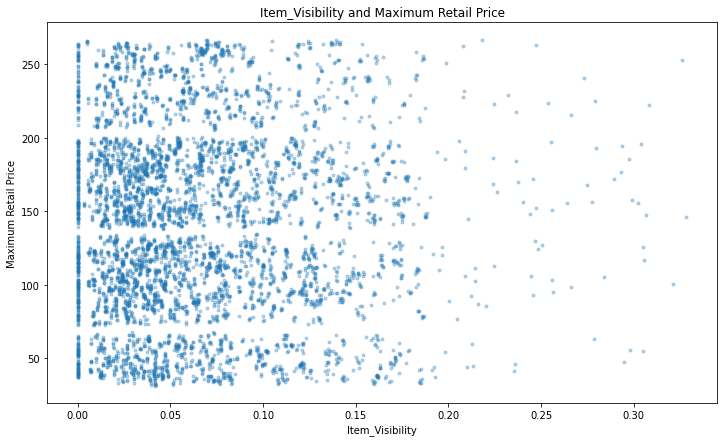

In [26]:
# Item visibility and maximum retail price
plt.figure(figsize=(12,7))
plt.xlabel('Item_Visibility')
plt.ylabel('Maximum Retail Price')
plt.title('Item_Visibility and Maximum Retail Price')
plt.plot(df.Item_Visibility, df.Item_MRP, ".",alpha = 0.3)
plt.show()

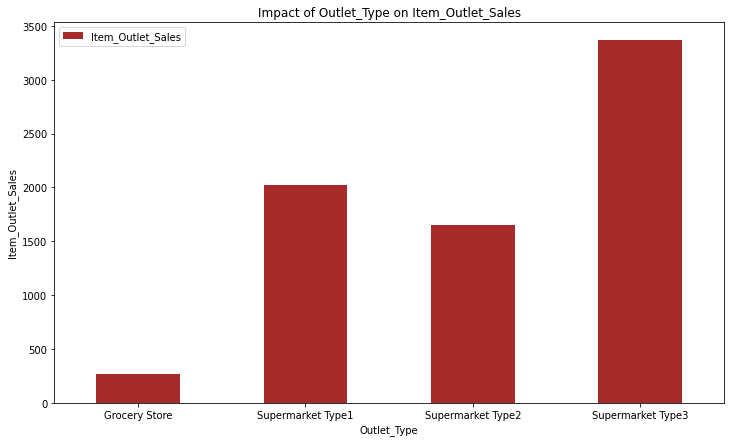

In [27]:
# Impact of outlet_type on item_outlet_sales
Item_Type_pivot = \
df.pivot_table(index='Outlet_Type', values="Item_Outlet_Sales", aggfunc=np.median)

Item_Type_pivot.plot(kind='bar',color='brown',figsize=(12,7))
plt.xlabel('Outlet_Type')
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Type on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

Low Fat    3641
Regular    2076
LF          233
reg          82
low fat      81
Name: Item_Fat_Content, dtype: int64


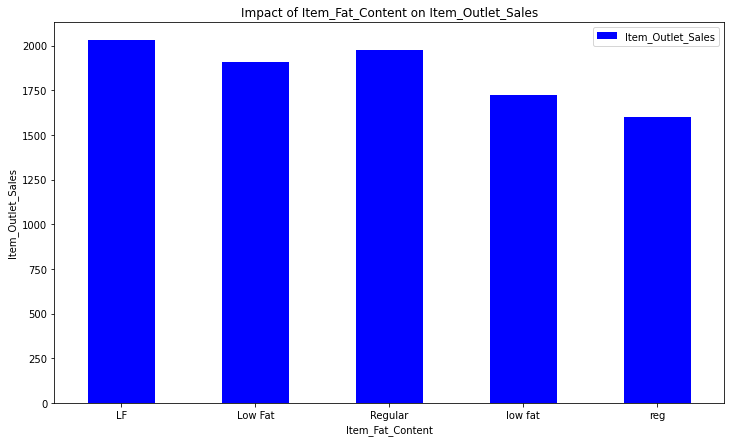

In [28]:
# Item of item_fat content on item_outlet_sales
Item_Type_pivot = \
df.pivot_table(index='Item_Fat_Content', values="Item_Outlet_Sales", aggfunc=np.median)

Item_Type_pivot.plot(kind='bar',color='blue',figsize=(12,7))
plt.xlabel('Item_Fat_Content')
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Item_Fat_Content on Item_Outlet_Sales")
plt.xticks(rotation=0)
print(df['Item_Fat_Content'].value_counts())
plt.show()

In [29]:
# Renaming the same types in item_fat_content
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat',})

Low Fat    3955
Regular    2158
Name: Item_Fat_Content, dtype: int64


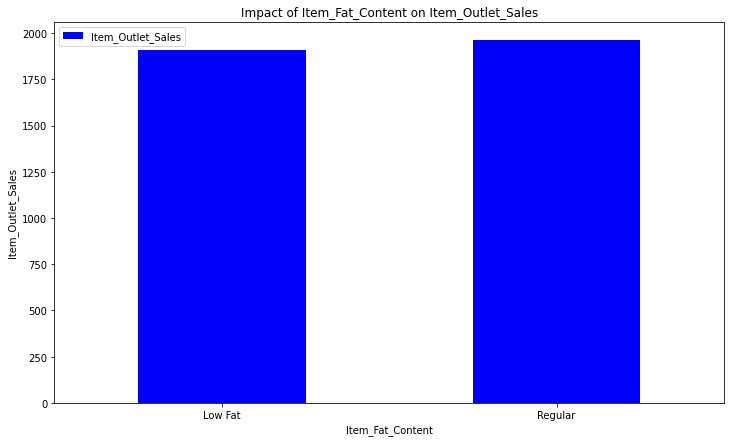

In [30]:
Item_Type_pivot = \
df.pivot_table(index='Item_Fat_Content', values="Item_Outlet_Sales", aggfunc=np.median)

Item_Type_pivot.plot(kind='bar',color='blue',figsize=(12,7))
plt.xlabel('Item_Fat_Content')
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Item_Fat_Content on Item_Outlet_Sales")
plt.xticks(rotation=0)
print(df['Item_Fat_Content'].value_counts())
plt.show()

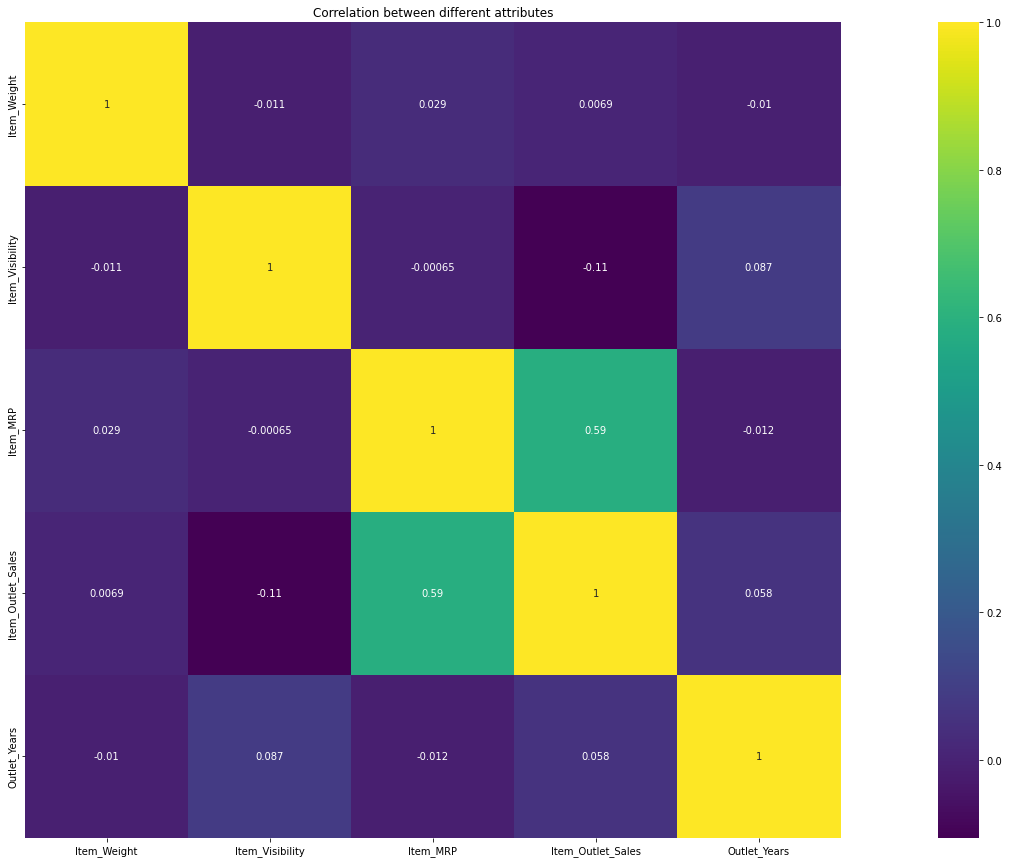

In [31]:
# Checking the correlation between the variables
plt.figure(figsize=(35,15))
sns.heatmap(df.corr(),vmax=1, square=True,annot=True, cmap='viridis')
plt.title('Correlation between different attributes')
plt.show()

In [32]:
df.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years,New_Item_type
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,10,Food
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,0,Drinks
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,10,Food
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,22,Non-Consumable
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,Medium,Tier 3,Supermarket Type2,556.6088,0,Food


### FeatureTransformation

In [33]:
# Dropping unnecessary columns
df.drop(["Item_Identifier","Outlet_Identifier","Item_Visibility","New_Item_type","Outlet_Type","New_Item_type"], axis = 1, inplace = True)

In [34]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Outlet_Years
0,9.300,Low Fat,Dairy,249.8092,Medium,Tier 1,3735.1380,10
1,5.920,Regular,Soft Drinks,48.2692,Medium,Tier 3,443.4228,0
2,17.500,Low Fat,Meat,141.6180,Medium,Tier 1,2097.2700,10
4,8.930,Low Fat,Household,53.8614,High,Tier 3,994.7052,22
5,10.395,Regular,Baking Goods,51.4008,Medium,Tier 3,556.6088,0


In [35]:
label = LabelEncoder()
df.Item_Fat_Content = label.fit_transform(df.Item_Fat_Content)
df.Item_Type = label.fit_transform(df.Item_Type)
df.Outlet_Location_Type = label.fit_transform(df.Outlet_Location_Type)
df.Outlet_Size = label.fit_transform(df.Outlet_Size)

In [36]:
df.head(4)

,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Outlet_Years
0,9.30,0,4,249.8092,1,0,3735.1380,10
1,5.92,1,14,48.2692,1,2,443.4228,0
2,17.50,0,10,141.6180,1,0,2097.2700,10
4,8.93,0,9,53.8614,0,2,994.7052,22


In [37]:
# Dependent and independent variable separation
x = df.drop(columns = "Item_Outlet_Sales")
y = df.Item_Outlet_Sales

In [38]:
x.head(4)

,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Years
0,9.30,0,4,249.8092,1,0,10
1,5.92,1,14,48.2692,1,2,0
2,17.50,0,10,141.6180,1,0,10
4,8.93,0,9,53.8614,0,2,22


In [39]:
y

0       3735.1380
1        443.4228
2       2097.2700
4        994.7052
5        556.6088
          ...    
8517    3608.6360
8518    2778.3834
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 6113, dtype: float64

In [40]:
# Multicollinearity check

## VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]
  
print(vif_data)

                feature       VIF
0           Item_Weight  8.091191
1      Item_Fat_Content  1.533533
2             Item_Type  3.736460
3              Item_MRP  5.459157
4           Outlet_Size  4.568440
5  Outlet_Location_Type  2.859920
6          Outlet_Years  2.959345


Thus the dataset needs no-scaling since the vif is low for all the variables

In [41]:
# Train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

### Linear Regression

In [42]:
model_lr = LinearRegression()
model_lr.fit(x_train, y_train)

y_pred = model_lr.predict(x_test)
print(r2_score(y_test, y_pred))

print(f"The model prediction on train dataset: {round(model_lr.score(x_train, y_train),2)}")
print(f"The model prediction on test dataset: {round(model_lr.score(x_test, y_test),2)}")

0.4166912044769303
The model prediction on train dataset: 0.38
The model prediction on test dataset: 0.42


### Support Vector Regressor

In [43]:
model_svr = SVR()
model_svr.fit(x_train , y_train)
print(f"The model prediction on train dataset: {round(model_svr.score(x_train, y_train),2)}")
print(f"The model prediction on test dataset: {round(model_svr.score(x_test, y_test),2)}")

The model prediction on train dataset: 0.14
The model prediction on test dataset: 0.14


### KNN

In [44]:
model_knn = KNeighborsRegressor()
model_knn.fit(x_train , y_train)
print(f"The model prediction on train dataset: {round(model_knn.score(x_train, y_train),2)}")
print(f"The model prediction on test dataset: {round(model_knn.score(x_test, y_test),2)}")

The model prediction on train dataset: 0.57
The model prediction on test dataset: 0.41


### Decision Tree

In [45]:
model_dt = DecisionTreeRegressor()
model_dt.fit(x_train , y_train)
print(f"The model prediction on train dataset: {round(model_dt.score(x_train, y_train),2)}")
print(f"The model prediction on test dataset: {round(model_dt.score(x_test, y_test),2)}")

The model prediction on train dataset: 1.0
The model prediction on test dataset: 0.19


### Random Forest

In [46]:
model_rf = RandomForestRegressor()
model_rf.fit(x_train , y_train)
print(f"The model prediction on train dataset: {round(model_rf.score(x_train, y_train),2)}")
print(f"The model prediction on test dataset: {round(model_rf.score(x_test, y_test),2)}")

The model prediction on train dataset: 0.93
The model prediction on test dataset: 0.56


### Extra Tree Regressor

In [47]:
model_et = ExtraTreesRegressor()
model_et.fit(x_train , y_train)
print(f"The model prediction on train dataset: {round(model_et.score(x_train, y_train),2)}")
print(f"The model prediction on test dataset: {round(model_et.score(x_test, y_test),2)}")

The model prediction on train dataset: 1.0
The model prediction on test dataset: 0.51


### Adaptive Boost Regressor

In [48]:
model_ada = AdaBoostRegressor(base_estimator=model_dt)
model_ada.fit(x_train , y_train)
print(f"The model prediction on train dataset: {round(model_ada.score(x_train, y_train),2)}")
print(f"The model prediction on test dataset: {round(model_ada.score(x_test, y_test),2)}")

The model prediction on train dataset: 0.99
The model prediction on test dataset: 0.48


### Gradient Boosting Regressor

In [49]:
model_gbo = GradientBoostingRegressor()
model_gbo.fit(x_train , y_train)
print(f"The model prediction on train dataset: {round(model_gbo.score(x_train, y_train),2)}")
print(f"The model prediction on test dataset: {round(model_gbo.score(x_test, y_test),2)}")

The model prediction on train dataset: 0.62
The model prediction on test dataset: 0.6


Thus we can see that Gradient boosting model gives us the highest sore of 60% on the train datatset.We will use this model for final deployment.

In [50]:
## BEST MODEL SAVE
pickle.dump(model_gbo, open('model.pkl','wb'))
model=pickle.load(open('model.pkl','rb'))